# python.studies
My notebook documenting my learnings from Wes McKinney's book [Python for Data Analysis 3E](https://wesmckinney.com/book/).<br><br>
This notebook won't serve as a general reference of the book as it will only show **WHAT I LEARNED** or **WHAT I FOUND NOTEWORTHY**. Other students will most likely have a completely different experience...

### 1. Installations and settings
This section will host all pip installs that will be needed to run the code of this notebook and some usefull settings for Jupyter notebooks.

In [1]:
# Installs
! pip install -Uqq ipython
! pip install -Uqq ipykernel
! pip install -Uqq numpy
! pip install -Uqq pandas
! pip install -Uqq jupyterlab-visualpython

In [2]:
# Settings
import numpy as np, pandas as pd
np.set_printoptions(linewidth=140)
pd.set_option('display.width', 140)

### 2.2: IPython and Jupyter Notebooks basics

#### Tab completion, help and introspection
1. To **start the enhanced iPython interpreter** invoke the command  `iPython` in a terminal.
2. To **open a Jupyter notebook** from a workspace in Visual Studio Code in the default browser type the command `jupyter notebook` or `jupyter lab` in a terminal to start the Jupyter server.
3. Use `TAB` to invoke **tab completion** at the IPython prompt or in Jupyter notebooks.
4. **Tab completion also works for user-clared variables or class instances** showing all attributes and methods like `myclassinstance.<TAB>`.
5. By default magic and hidden functions are not shown this way. **To show magic and hidden functions** invoke `myclassinstance._<TAB>`.
6. Another area where tab completion saves time is in the **tab completion of function keyword arguments**.
7. Introspection: using a question mark (?) before or after a variable and executing the cell will like `x?<SHIFT+ENTER>` **display general information about an object**. Note: works only if the rest of the line is empty!
8. To display **contextual help** in a Jupyter notebook type `CTRL + i`.

In [ ]:
# 3. General code completion
np.da  # Place the cursor behind `da` and hit TAB

In [5]:
# 4. Code completion for user-declared variables 
x = 1
x.  # Place the cursor behind the dot and hit TAB

In [4]:
# 5. Code completion for magic / hidden functions
x = 1
x._  # Place the cursor behind the dot and hit TAB

True

In [16]:
# 6. Tab completion for function keyword arguments
def function_with_kwargs(abra = 1, abbra = 2, abbbra = 3):
    return abra, abbra, abbbra

In [ ]:
function_with_kwargs(ab  # Place the cursor behind ab and hit TAB

In [ ]:
# 7. Introspection

In [15]:
# Execute this cell
x = 1;x?

Type:        int
String form: 1
Docstring:  
int([x]) -> integer
int(x, base=10) -> integer

Convert a number or string to an integer, or return 0 if no arguments
are given.  If x is a number, return x.__int__().  For floating point
numbers, this truncates towards zero.

If x is not a number or if base is given, then x must be a string,
bytes, or bytearray instance representing an integer literal in the
given base.  The literal can be preceded by '+' or '-' and be surrounded
by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
Base 0 means to interpret the base from the string as an integer literal.
>>> int('0b100', base=0)
4

### 2.3 Python basics

#### Python's type system

When **assigning a variable (or name) in Python, you are creating a reference** to the object shown on the righthand side of the equals sign.

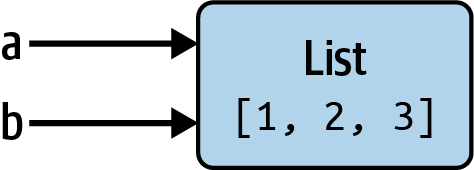

In [23]:
# Example
a = [1, 2, 3]
b = a
print(f"b after declaration is {b}")
a.append(4)
print(f"b after appending something to a is {b}")

b after declaration is [1, 2, 3]
b after appending something to a is [1, 2, 3, 4]


**Python has dynamic references, but strong types!**

References (~variable assignments) can be changed freely in a script but Python is a strongly typed language, which means that every object has a specific type (or class), and implicit conversions will occur only in certain permitted circumstances e.g., the divison of a float by an integer where the integer will be cast temporarily to a float.

In [29]:
# Dynamic references
a = 1
print(type(a))
a = "foo"
print(type(a))

# Note: both objects 1 and foo exist in memory until garbage collected but the object that a refers to is changed.

<class 'int'>
<class 'str'>


In [38]:
# Strong types
"5" + 5  # will throw an error as an implicit type conversion in Python does not exist in this case!

TypeError: can only concatenate str (not "int") to str

In [37]:
# Implicit conversion: divison of a float by an integer.
a = 4.5
b = 2
print(f"a is {type(a)} and b is {type(b)}.")
a / b
print(f"b is still {type(b)} after the operation.")

a is <class 'float'> and b is <class 'int'>.
b is still <class 'int'> after the operation.


#### Checking instances and types

**Knowing the type of an object is important**, and it’s useful to be able to write functions that can handle many different kinds of input. You can check that an object is an instance of a particular type using the `isinstance(object, type)` function or with a user-defined `isiterable(object)`function.

In [40]:
a = 5
print(isinstance(a, int))

True


In [52]:
def isiterable(obj):
    try:
        iter(obj)
        return True
    except TypeError:  # not iterable
        return False
    
e = [[1, 2, 3], "foo", 1]
print([isiterable(element) for element in e])

[True, True, False]


#### Imports

In Python, a module is simply a file with the .py extension containing Python code. Suppose we had the following module:

    # some_module.py
    PI = 3.14159
    
    def f(x):
        return x + 2
    
    def g(a, b):
        return a + b
If we wanted to access the variables and functions defined in some_module.py, from another file in the same directory we could do:  

    import some_module
    result = some_module.f(5)
    pi = some_module.PI
Or alternately:  

    from some_module import g, PI
    result = g(5, PI)

Note the difference here! In the second import with `from...` we explicitely named the attributes / methods to import with the effect that we don't need to use the file name as prefix.

By using the as keyword, you can give imports different variable names:

    import some_module as sm
    from some_module import PI as pi, g as gf
    
    r1 = sm.f(pi)
    r2 = gf(6, pi)

#### Binary operators and comparisons

|Operation 	|Description|
|:---|:---|
|a + b|Add a and b|
|a - b|Subtract b from a|
|a * b| 	Multiply a by b|
|a / b |	Divide a by b|
|a // b| 	Floor-divide a by b, dropping any fractional remainder|
|a ** b |	Raise a to the b power|
|a & b| 	True if both a and b are True; for integers, take the bitwise AND|
|a \| b| 	True if either a or b is True; for integers, take the bitwise OR|
|a ^ b |	For Booleans, True if a or b is True, but not both; for integers, take the bitwise EXCLUSIVE-OR|
|a == b |	True if a equals b|
|a != b 	|True if a is not equal to b|
|a < b, a <= b| 	True if a is less than (less than or equal to) b|
|a > b, a >= b| 	True if a is greater than (greater than or equal to) b|
|a is b 	|True if a and b reference the same Python object|
|a is not b 	|True if a and b reference different Python objects|

#### Check if two variables refer to the same object
To check if two variables refer to the same object, use the is keyword. Use is not to check that two objects are not the same.

In [3]:
a = [1, 2, 3]

b = a

c = list(a)

print(a is b)
# Out[43]: True

print(a is not c)
# Out[44]: True

True
True


#### Mutable and immutable objects

- Many objects in Python, such as lists, dictionaries, NumPy arrays, and most user-defined types (classes), are mutable.
- Others, like strings and tuples, are immutable, which means their internal data cannot be changed.

#### Scalar types  
Python has a small set of built-in types for handling numerical data, strings, Boolean (True or False) values, and dates and time (provided by the `datetime` module in the standard library). 

|Type| 	Description|
|:---|:---|
|None|The Python “null” value (only one instance of the None object exists)|
|str|String type; holds Unicode strings|
|bytes|Raw binary data|
|float|Double-precision floating-point number (note there is no separate double type)|
|bool|A Boolean True or False value|
|int|Arbitrary precision integer|  



#### Strings
Many people use Python for its built-in string handling capabilities. You can write string literals using either single quotes ' or double quotes " (double quotes are generally favored).  

For multiline strings with line breaks, you can use triple quotes, either ''' or """.

In [5]:
c = """
This is a longer string that
spans multiple lines
"""
c.count("\n")

3

Strings are a sequence of Unicode characters and therefore can be treated like other sequences, such as slicing with lists and tuples.

In [7]:
s = "python"
s[:3]

'pyt'

The backslash character \ is an escape character, meaning that it is used to specify special characters like newline \n or Unicode characters. To write a string literal with backslashes, you need to escape them.

In [8]:
s = "12\\34"
print(s)

12\34


For a string with a lot of backslashes and no special characters, you can preface the leading quote of the string with r (for raw), which means that the characters should be interpreted as is.

In [9]:
s = r"this\has\no\special\characters"
s

'this\\has\\no\\special\\characters'

As strings are immutable. If we need to modify a string, we have to use a function or method that creates a new string, such as the string replace method or concatenating.

In [30]:
a = "this is a string"
b = a.replace("string", "longer string")
b

'this is a longer string'

In [32]:
c = " and this is another even longer string"
b + c

'this is a longer string and this is another even longer string'

#### String templating or formatting
String formatting is an important and a deep topic; there are multiple methods and numerous options and tweaks available to control how values are formatted in the resulting string. To learn more, consult the
[official Python documentation](https://docs.python.org/3/library/string.html).  
Here are two ways to do it.

In [26]:
template = "{0:.2f} {1:s} are worth US${2:d}"

- {0:.2f} means to format the first argument as a floating-point number with two decimal places.
- {1:s} means to format the second argument as a string.
- {2:d} means to format the third argument as an exact integer.

To substitute arguments for these format parameters, we pass a sequence of arguments to the format method.

In [28]:
template.format(88.46, "Argentine Pesos", 1)

'88.46 Argentine Pesos are worth US$1'

#### f-strings (short for formatted string literals)

Format specifiers can be added after each expression using the same syntax as with string templates e.g.,  `:.2f`.

In [19]:
amount = 10
rate = 88.46
currency = "Pesos"

f"{amount} {currency} is worth US${amount / rate:.2f}"

'10 Pesos is worth US$0.11'

#### Bytes and Unicode  
In modern Python (i.e., Python 3.0 and up), **Unicode has become the first-class string type** to enable more consistent handling of ASCII and non-ASCII text. In older versions of Python, strings were all bytes without any explicit Unicode encoding.

In [33]:
# Example Unicode string with non-ASCII characters
val = "español"
val

'español'

In [36]:
# Convert this Unicode string to its UTF-8 bytes representation using the encode method
val_utf8 = val.encode("utf-8")
val_utf8

b'espa\xc3\xb1ol'

In [35]:
type(val_utf8)

bytes

In [37]:
# Assuming you know the Unicode encoding of a bytes object, you can go back using the decode method.
val_utf8.decode("utf-8")

'español'

#### Dates and times  
The built-in Python `datetime` module provides `datetime`, `date`, and `time` types. The `datetime` type combines the information stored in `date` and `time` and is the most commonly used.  
For a full list of formatting options as introduced below, see [Table 11.2](https://wesmckinney.com/book/time-series#tbl-table_datetime_formatting).    
  **Note that datetime objects are immutable!**

In [39]:
from datetime import datetime, date, time
dt = datetime(2011, 10, 29, 20, 31, 21)
dt

datetime.datetime(2011, 10, 29, 20, 31, 21)

In [49]:
# Extract components with the functions date() and time()
print(dt.date(), dt.time())

2011-10-29 20:31:21


In [50]:
# Format a datetime as a string with the function strftime()
dt.strftime("%Y-%m-%d %H:%M")

'2011-10-29 20:31'

In [56]:
# Convert strings into datetime objects with the strptime function
datetime.strptime("20091031", "%Y%m%d")

datetime.datetime(2009, 10, 31, 0, 0)

In [58]:
# Replace time fields of a series of datetimes—for example, replacing the minute and second fields with zero.
# Note: We use dt_hour as we cannot change the immutable datetime object dt.
dt_hour = dt.replace(minute=0, second=0)
dt_hour

datetime.datetime(2011, 10, 29, 20, 0)

In [69]:
# Calculation datetime difference creating a type timedelta.
dt2 = datetime(2011, 11, 15, 22, 30)
delta = dt2 - dt
delta

datetime.timedelta(days=17, seconds=7119)

In [76]:
# Using timedelta to "shift" a datetime object
dt_shifted = dt + delta
print(dt2 is dt_shifted)

False


#### Flow control with if, elif, else

It is also possible to chain comparisons.

In [78]:
if 5 > 4 > 2:
    print(True)

True


#### Flow control with for loops

- For loops are for iterating over a collection (like a list or tuple) or an iterater.
- `continue`: You can advance a for loop to the next iteration, skipping the remainder of the block, using the continue keyword.
- `break`: A for loop can be exited altogether with the break keyword. Note though, that in case of nested for loops only the loop will be exited in which the break keyword is placed.
-  If the elements in the collection or iterator are sequences (tuples or lists, say), they can be conveniently unpacked into variables in the for loop statement.

In [81]:
# Example: general format
collection = []
for value in collection:
    # do something with value
    pass

In [85]:
# Example: advancing with continue
collection = [1, 2, None, 4, None, 5]
total = 0

for value in collection:
    if value is None:
        continue
    total += value

total

12

In [87]:
# Example: breaking with break
collection = [1, 2, 0, 4, 6, 5, 2, 1]
total_until_5 = 0

for value in collection:
    if value == 5:
        break
    total_until_5 += value

total_until_5

13

In [100]:
# Example: only the loop will be exited in which the break keyword is placed.

for i in range(4):
    for j in range(4):
        if j > i:
            break
        print((i, j))
    if j > 2:
        break

(0, 0)
(0, 1)
(0, 2)
(0, 3)


In [102]:
# Example: unpacking iterators, general syntax
iterator = []

for a, b, c in iterator:
    # do something
    pass

#### Flow control with while loops  

A `while` loop specifies a condition and a block of code that is to be executed until the condition evaluates to `False` or the loop is explicitly ended with `break`. 

In [1]:
x = 256
total = 0
while x > 0:
    if total > 500:
        break
    total += x
    x = x // 2
    print(x, total)

128 256
64 384
32 448
16 480
8 496
4 504


### 3  Built-In Data Structures, Functions, and Files
